In [0]:
# import and install packages
!pip install geopandas
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [8]:
# read geographical data of germany
gdf = gpd.read_file('https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/d677229523ef8ce7e9839909c0bca035618b05fa/2_bundeslaender/4_niedrig.geojson')
gdf.head()

,id,name,type,geometry
0,DE-BW,Baden-Württemberg,State,"MULTIPOLYGON (((9.65046 49.77634, 9.63747 49.6..."
1,DE-BY,Bayern,State,"POLYGON ((10.13386 50.55000, 10.20432 50.55380..."
2,DE-BE,Berlin,State,"POLYGON ((13.16181 52.59442, 13.21621 52.58252..."
3,DE-BB,Brandenburg,State,"POLYGON ((13.87951 53.50107, 13.91737 53.42054..."
4,DE-HB,Bremen,State,"POLYGON ((8.98545 53.12822, 8.94874 53.12380, ..."


In [0]:
plt.rcParams['figure.figsize'] = [16, 11]

In [10]:
# read data (source https://www.divi.de/register/tagesreport)
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,krankenhausStandort/bezeichnung,bettenStatus/statusHighCare,krankenhausStandort/position/latitude,krankenhausStandort/position/longitude,free_icu_beds_percent,staff_utilization_percent
0,0,"Städtisches Klinikum Dresden, Städtisches Klin...",VERFUEGBAR,51.059520,13.718164,55,99
1,1,Diakonissenkrankenhaus Dresden,VERFUEGBAR,51.062785,13.761286,64,96
2,2,"Städtisches Klinikum Dresden, Städtisches Klin...",VERFUEGBAR,51.089996,13.709002,65,91
3,3,Herzzentrum Dresden,VERFUEGBAR,51.058087,13.777707,40,99
4,4,"Krankenhaus St. Joseph-Stift Dresden GmbH, Kra...",VERFUEGBAR,51.047261,13.761894,60,94


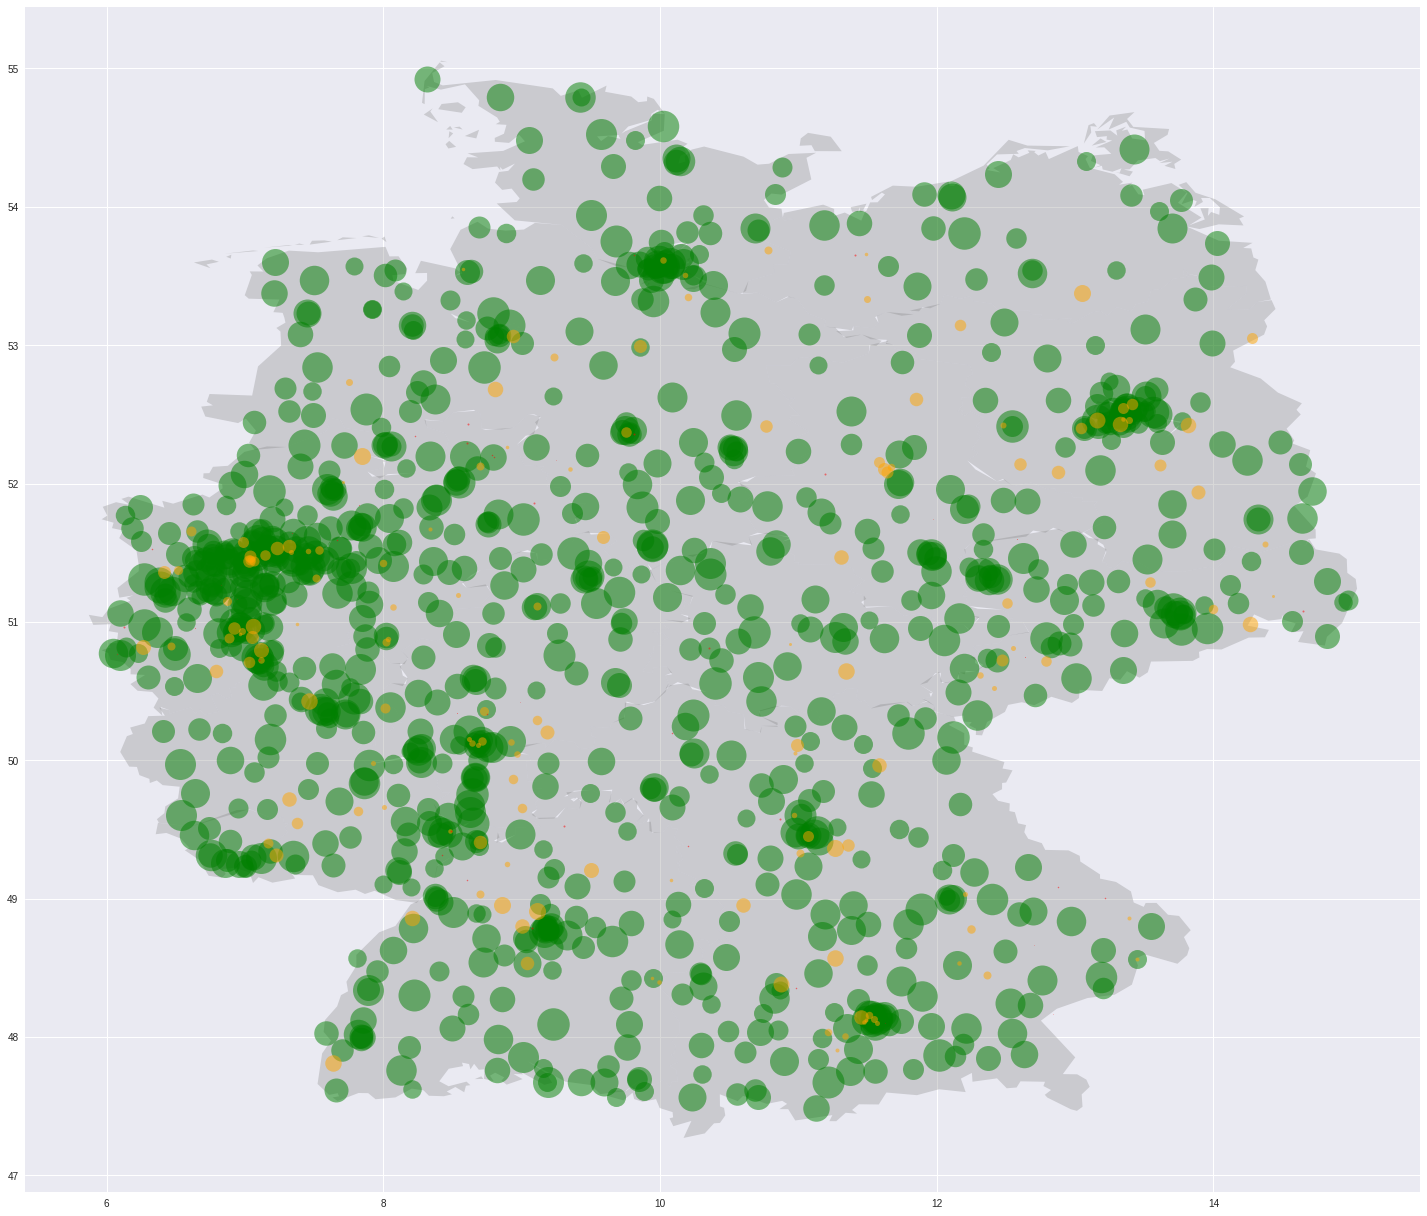

In [11]:
# creating a map of germany
# every bubble represents one hospital in germany
# green bubble means there are free ICU beds
# orange bubble means there are just a few free ICU beds
# red bubble means there are no free ICU beds in this special hospital
plt.rcParams['figure.figsize'] = [25, 100]
fig, ax = plt.subplots()
gdf.plot(ax=ax, color='gray', alpha=0.3)
for i in range(len(df)):
  if df.loc[i, 'bettenStatus/statusHighCare'] == 'VERFUEGBAR':
    markercolor = 'green'
  elif df.loc[i, 'bettenStatus/statusHighCare'] == 'BEGRENZT':
    markercolor = 'orange'
  elif df.loc[i, 'bettenStatus/statusHighCare'] == 'NICHT_VERFUEGBAR':
    markercolor = 'red'

  ax.plot(
      df.loc[i, 'krankenhausStandort/position/longitude'],
      df.loc[i, 'krankenhausStandort/position/latitude'],
      marker='o',
      c = markercolor,
      alpha=0.5,
      markersize = df.loc[i, 'free_icu_beds_percent'] / 2
  )